## Limpieza de los datos

### Importación BBDD de MySQL

In [2]:
import warnings
warnings.filterwarnings("ignore")

from dotenv import load_dotenv
import os
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import pandas as pd
import mysql.connector

In [3]:
# Cargar las variables de entorno desde el archivo .env especificando la ruta completa
load_dotenv(r"C:\Users\giuia\OneDrive\SIMULADOR\.env")

# Verificar si las variables de entorno están cargadas
print("SQL_USER:", os.getenv("SQL_USER"))
print("SQL_PASSWORD:", os.getenv("SQL_PASSWORD"))
print("SQL_HOST:", os.getenv("SQL_HOST"))
print("SQL_PORT:", os.getenv("SQL_PORT"))
print("DB_NAME:", os.getenv("DB_NAME"))

SQL_USER: Equipo10
SQL_PASSWORD: E1q2u3i4p5o10
SQL_HOST: 212.227.90.6
SQL_PORT: 3306
DB_NAME: Equip_10


In [4]:


# Función para leer las tablas de la base de datos
def leer_tablas():
    # Obtener las variables de entorno
    usuario = os.getenv("SQL_USER")
    contraseña = os.getenv("SQL_PASSWORD")
    host = os.getenv("SQL_HOST")
    puerto = os.getenv("SQL_PORT")
    base_datos = os.getenv("DB_NAME") 
   

    # Creamos la conexión directa con MySQL
    connection = mysql.connector.connect(
        user=usuario,
        password=contraseña,
        host=host,
        port=puerto,
        database=base_datos
    )
    
    # Obtenemos todos los nombres de las tablas de la base de datos
    query_tablas = "SHOW TABLES"
    tablas = pd.read_sql(query_tablas, con=connection)

    # Recorremos cada tabla y la leemos automáticamente
    for nombre_tabla in tablas.iloc[:, 0]:  # Accede a la columna con los nombres de las tablas
        query = f"SELECT * FROM {nombre_tabla}"
        df = pd.read_sql(query, con=connection)  # Usamos la conexión
        globals()[nombre_tabla] = df  # Crea una variable con el nombre de la tabla
        print(f"Tabla '{nombre_tabla}' cargada correctamente como DataFrame.")

    return connection  # Solo devolvemos la conexión

# Función para borrar la base de datos
def borrar_base_datos(connection, base_datos):
    try:
        # Creamos el cursor para ejecutar comandos SQL
        cursor = connection.cursor()
        
        # Ejecutamos la sentencia para borrar la base de datos
        cursor.execute(f"DROP DATABASE IF EXISTS {base_datos}")
        connection.commit()  # Asegura que los cambios se apliquen
        print(f"La base de datos '{base_datos}' ha sido eliminada correctamente.")
        cursor.close()
    except Exception as e:
        print(f"Error al intentar eliminar la base de datos: {e}")

# Función para cerrar la conexión
def cerrar_conexion(connection):
    try:
        connection.close()
        print("Conexión cerrada correctamente.")
    except Exception as e:
        print(f"Error al intentar cerrar la conexión: {e}")

# Llamamos a la función para importar las tablas
connection = leer_tablas()
# cerrar la conexión
cerrar_conexion(connection)

Tabla 'Tourist_Accommodation' cargada correctamente como DataFrame.
Tabla 'Tourist_Accommodation19052025' cargada correctamente como DataFrame.
Conexión cerrada correctamente.


In [5]:
df= Tourist_Accommodation19052025

df

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2,1,...,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,31/07/2018
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1,1,...,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,10/01/2020
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1,2,...,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,29/07/2019
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2,1,...,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,10/01/2020
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,None,Private room,5,1,2,...,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,19/02/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,32392193,Espectacular habitaci�n,None,238089984,Sant Antoni,Eixample,Private room,1,1,1,...,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,spain,barcelona,16/10/2019
7996,32392774,? Tu Hogar de Lujo ????? en el Centro de Sevilla,"Exclusivo, amplio y luminoso alojamiento situa...",243246681,Arenal,Casco Antiguo,Entire home/apt,6,2,3,...,100.0,100.0,100.0,100.0,100.0,FALSO,157.0,spain,sevilla,31/01/2021
7997,32395123,Rooms by G Bella Mar�a 3,The 2-star Bella Maria has 24-hourreception an...,159933359,Felanitx,None,Entire home/apt,2,1,1,...,NaN,NaN,NaN,NaN,NaN,VERDADERO,NaN,spain,mallorca,24/04/2019
7998,32407332,LUMINOSO Y ENCANTADOR PISO CERCA DE TODO,PISO MUY ILUMINADO CON UNA TERRAZA ESTUPENDA C...,187631805,Proven�als del Poblenou,Sant Mart�,Private room,3,2,2,...,100.0,100.0,100.0,100.0,100.0,VERDADERO,389.0,spain,barcelona,12/08/2019


### Eliminación de casos duplicados en la FK 'apartment_id': 

Creación de un df que solo contenga los casos duplicados para poderlos examinar

In [6]:
# Suponiendo que tu DataFrame se llama 'df'
df_duplicados = df[df.duplicated(subset=['apartment_id'], keep=False)].copy()

In [7]:
df_duplicados

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
22,144471,BEST ZONEPL.CATALU�A ROOM X 2BATHROOM +WIFI,HELLO PEOPLE :=) are you on vacation? or busi...,700165,Sant Antoni,Eixample,Private room,2,1,1,...,90.0,90.0,90.0,90.0,80.0,FALSO,42.0,spain,barcelona,12/09/2017
23,144471,BEST ZONEPL.CATALU�A ROOM X 2BATHROOM +WIFI,HELLO PEOPLE :=) are you on vacation? or busi...,700165,Sant Antoni,Eixample,Private room,2,1,1,...,90.0,90.0,90.0,90.0,80.0,FALSO,38.0,spain,barcelona,10/10/2018
24,157327,House in Llofriu (Costa Brava),New rebuilt and furnished house pool bbq If yo...,755634,Forallac,None,Entire home/apt,8,5,4,...,100.0,100.0,100.0,80.0,80.0,FALSO,2.0,spain,girona,30/04/2020
25,157327,House in Llofriu (Costa Brava),New rebuilt and furnished house pool bbq If yo...,755634,Forallac,None,Entire home/apt,8,5,4,...,100.0,100.0,100.0,80.0,80.0,FALSO,3.0,spain,girona,30/08/2018
50,343864,3 BD APT IN THE HEART OF GRACIA,A spacious and comfortable 3 bedrooms apartmen...,1744516,la Vila de Gr�cia,Gr�cia,Entire home/apt,6,2,3,...,100.0,100.0,90.0,100.0,90.0,FALSO,11.0,spain,barcelona,05/06/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7919,32037155,Centric and Cosy apartment in Valencia,"El apartamento es rom�ntico y tranquilo, ubica...",209227142,SANT FRANCESC,CIUTAT VELLA,Entire home/apt,4,1,1,...,90.0,100.0,100.0,100.0,90.0,VERDADERO,386.0,spain,valencia,31/01/2020
7920,32037155,Centric and Cosy apartment in Valencia,"El apartamento es rom�ntico y tranquilo, ubica...",209227142,EL PLA DEL REMEI,L'EIXAMPLE,Entire home/apt,4,1,1,...,90.0,100.0,100.0,100.0,90.0,VERDADERO,217.0,spain,valencia,19/01/2021
7939,32161182,�tico Imperial con terraza B,"Precioso apartamento en el centro de Sevilla, ...",239935182,Santa Catalina,Casco Antiguo,Entire home/apt,6,2,2,...,100.0,100.0,100.0,100.0,90.0,VERDADERO,506.0,spain,sevilla,30/09/2019
7940,32161182,�tico Imperial con terraza B,"Precioso apartamento en el centro de Sevilla, ...",239935182,Santa Catalina,Casco Antiguo,Entire home/apt,6,2,2,...,100.0,100.0,100.0,100.0,90.0,VERDADERO,557.0,spain,sevilla,29/07/2019


Para la eliminación de los casos duplicados en 'apartment_id' hemos usado la variable 'insert_date' quedandonos con la fecha más moderna y eliminando el resto de registros repetidos.

In [8]:
# Transformar la variable temporal a datetime especificando el formato
df['insert_date'] = pd.to_datetime(df['insert_date'], format='%d/%m/%Y')

# Ordena el DataFrame por 'apartment_id' y luego por 'insert_date' de forma descendente
df_ordenado = df.sort_values(by=['apartment_id', 'insert_date'], ascending=[True, False])

# Elimina los duplicados de 'apartment_id', quedándonos con el primero (el más reciente por el ordenamiento)
df_sin_duplicados = df_ordenado.drop_duplicates(subset=['apartment_id'], keep='first').copy()

# Si quieres resetear el índice del DataFrame resultante
df_sin_duplicados = df_sin_duplicados.reset_index(drop=True)

print(f"Tamaño del DataFrame original: {len(df)}")
print(f"Tamaño del DataFrame sin duplicados: {len(df_sin_duplicados)}")

Tamaño del DataFrame original: 8000
Tamaño del DataFrame sin duplicados: 7693


### Eliminación de datos nulls y transformación de variables:

#### Transformación de variables temporales:

In [9]:
# Convertir las variables temporales a datetime:
df_sin_duplicados['first_review_date'] = pd.to_datetime(df_sin_duplicados['first_review_date'], format='%d/%m/%Y')
df_sin_duplicados['last_review_date'] = pd.to_datetime(df_sin_duplicados['last_review_date'], format='%d/%m/%Y')

#### Transformación las variables 'bathrooms','bedrooms' y 'beds'
- Para poder poner las variables con el formato adecuado primero se ha hacer un tratamiendo de los datos nulls.
- Se ha imputado el valor de la mediana de los nulls usando otras variables como referencia para crear grupos homogeneos.

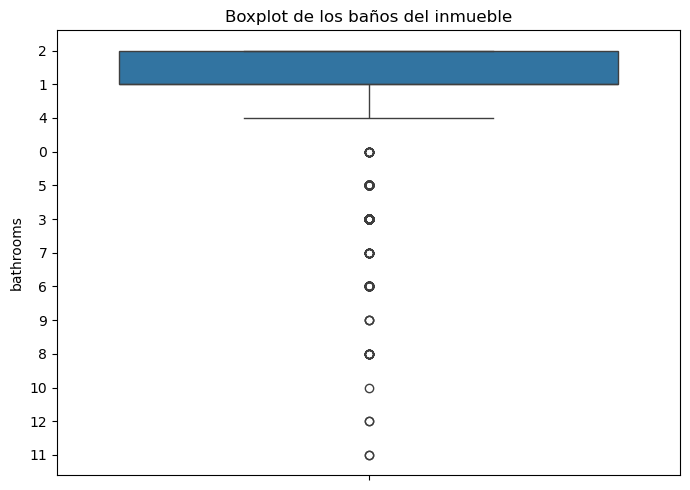

In [10]:
import matplotlib.pyplot as plt    
import seaborn as sns  

# Grafico boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_sin_duplicados['bathrooms'])
plt.xticks(rotation=45)
plt.title('Boxplot de los baños del inmueble')
plt.tight_layout()
plt.show()

In [11]:
import numpy as np

# Primero, convierte la columna 'bathrooms' a numérico, los errores se convierten a NaN
df_sin_duplicados['bathrooms'] = pd.to_numeric(df_sin_duplicados['bathrooms'], errors='coerce')

# Calcula la mediana de 'bathrooms' por cada número de 'accommodates'
mediana_bathrooms_por_accommodates = df_sin_duplicados.groupby('accommodates')['bathrooms'].median()

# Imputa los valores nulos en 'bathrooms' usando la mediana correspondiente al número de 'accommodates'
def imputar_bathrooms(row):
    if pd.isnull(row['bathrooms']):
        return mediana_bathrooms_por_accommodates.get(row['accommodates'], df_sin_duplicados['bathrooms'].median()) # Si no hay mediana para ese 'accommodates', usa la mediana general
    return row['bathrooms']

df_sin_duplicados['bathrooms'] = df_sin_duplicados.apply(imputar_bathrooms, axis=1)

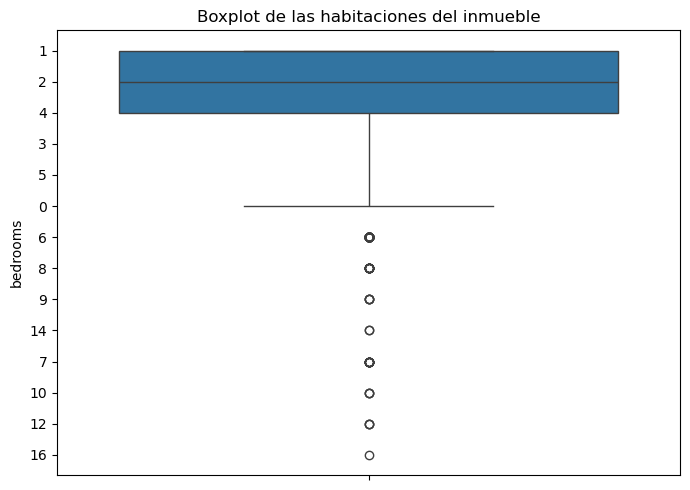

In [12]:
import matplotlib.pyplot as plt    
import seaborn as sns  

# Grafico boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_sin_duplicados['bedrooms'])
plt.xticks(rotation=45)
plt.title('Boxplot de las habitaciones del inmueble')
plt.tight_layout()
plt.show()

In [13]:
# Convertir la columna 'bedrooms' a numérico
df_sin_duplicados['bedrooms'] = pd.to_numeric(df_sin_duplicados['bedrooms'], errors='coerce')

# Calcular la mediana de 'bedrooms' por cada número de 'accommodates'
mediana_bedrooms_por_accommodates = df_sin_duplicados.groupby('accommodates')['bedrooms'].median()

# Imputar los valores nulos en 'bedrooms'
def imputar_bedrooms(row):
    if pd.isnull(row['bedrooms']):
        return mediana_bedrooms_por_accommodates.get(row['accommodates'], df_sin_duplicados['bedrooms'].median())
    return row['bedrooms']

df_sin_duplicados['bedrooms'] = df_sin_duplicados.apply(imputar_bedrooms, axis=1)

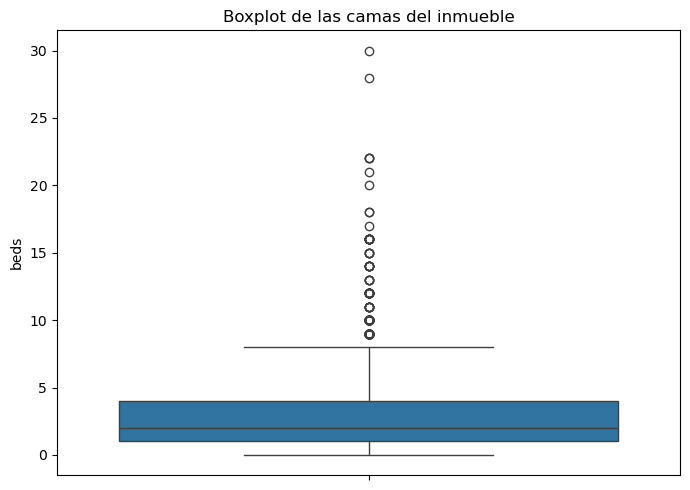

In [14]:
import matplotlib.pyplot as plt    
import seaborn as sns  

# Grafico boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_sin_duplicados['beds'])
plt.xticks(rotation=45)
plt.title('Boxplot de las camas del inmueble')
plt.tight_layout()
plt.show()

In [15]:
# Calcular la mediana de 'beds' por cada número de 'accommodates'
mediana_bedrooms_por_accommodates = df_sin_duplicados.groupby('accommodates')['beds'].median()

# Imputar los valores nulos en 'beds'
def imputar_bedrooms(row):
    if pd.isnull(row['beds']):
        return mediana_bedrooms_por_accommodates.get(row['accommodates'], df_sin_duplicados['beds'].median())
    return row['beds']

df_sin_duplicados['beds'] = df_sin_duplicados.apply(imputar_bedrooms, axis=1)

Para poder imputar en la variable 'price' un valor a los datos nulls se han usado las variables 'room_type' y 'city' para calcular la mediana de cada grupo y a esos grupos donde falta price se le ha aplicado la mediana que corresponde

### Imputación de valores en la variable 'price'

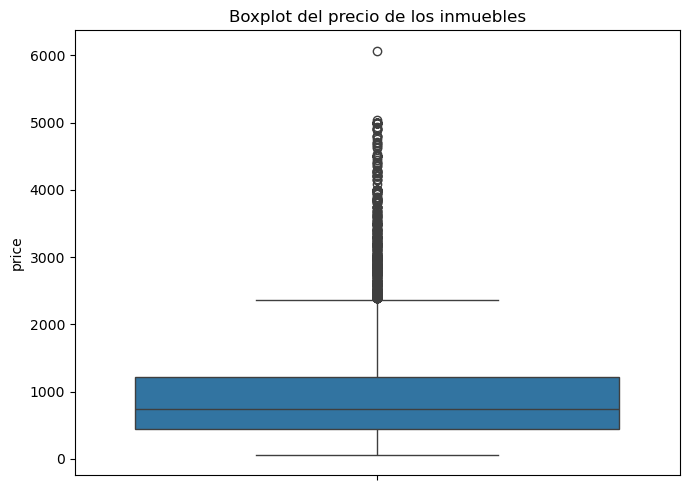

In [16]:
import matplotlib.pyplot as plt    
import seaborn as sns  

# Grafico boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_sin_duplicados['price'])
plt.xticks(rotation=45)
plt.title('Boxplot del precio de los inmuebles')
plt.tight_layout()
plt.show()

In [17]:
# Calcular la mediana de 'price' por 'city' y 'room_type'
mediana_price_por_city_roomtype = df_sin_duplicados.groupby(['city', 'room_type'])['price'].median()

# Función para imputar los valores nulos en 'price'
def imputar_price(row):
    if pd.isnull(row['price']):
        try:
            return mediana_price_por_city_roomtype[(row['city'], row['room_type'])]
        except KeyError:
            return df_sin_duplicados['price'].median() # Si no existe la combinación, usa la mediana general
    return row['price']

# Aplicar la imputación
df_sin_duplicados['price'] = df_sin_duplicados.apply(imputar_price, axis=1)

### Imputación de valores nulls en las variables score
 - La variable 'review_scores_rating' está en una escala diferente a las otras variables, así que he igualado su escala a la de las otras variables. Solo ejecutar el código 1 vez si no la escala se hace más pequeña que el resto. 
 - Esta variable es la de puntuación global. 

In [18]:
# Dividir entre 10 para ponerla en la misma escala que las otras variables
df_sin_duplicados['review_scores_rating'] = df_sin_duplicados['review_scores_rating'] / 10

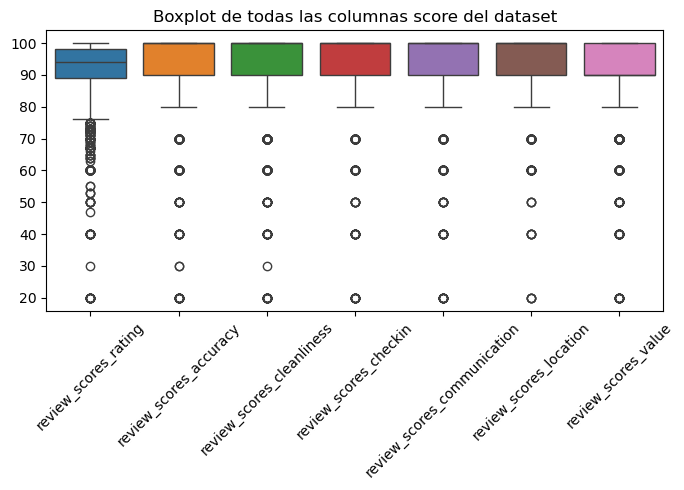

In [19]:
import matplotlib.pyplot as plt    
import seaborn as sns  

# Grafico boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(data=df_sin_duplicados.iloc[:, 23:30])
plt.xticks(rotation=45)
plt.title('Boxplot de todas las columnas score del dataset')
plt.tight_layout()
plt.show()

In [20]:
columnas_a_imputar = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                       'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                       'review_scores_value', 'reviews_per_month']

for columna in columnas_a_imputar:
    # Imputar con la mediana del grupo
    df_sin_duplicados[columna] = df_sin_duplicados.groupby(['city', 'room_type'])[columna].transform(lambda x: x.fillna(x.median()))
    # Imputar los nulos restantes con la mediana de la columna completa
    mediana_global = df_sin_duplicados[columna].median()
    df_sin_duplicados[columna] = df_sin_duplicados[columna].fillna(mediana_global)

# Verificar la cantidad de nulos después de la imputación
print(df_sin_duplicados[columnas_a_imputar].isnull().sum())

review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64


### Transformación variable has_availability todos los casos verdadero:

Hemos sustitudo 534 valores nulls imputandoles el valor True y hemos transformado el valor VERDADERO en True

In [21]:
# Transformar VERDADERO a True
df_sin_duplicados['has_availability'] = df_sin_duplicados['has_availability'].replace('VERDADERO', True)

# Imputacion a valores nulls por True
df_sin_duplicados['has_availability'].fillna(True, inplace=True)

### Datos nulls que siguen existiendo en el dataset:

In [22]:
# 1. Identificar filas con al menos un valor nulo:
df_sin_duplicados[df_sin_duplicados.isnull().any(axis=1)]

# 2. Obtener el número de valores nulos por columna y filtrar las que tienen al menos uno:
nulos_por_columna = df_sin_duplicados.isnull().sum()

# 3. Eliminar las variables que no tienen nulls de la visualizacion:
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]
print("\nNúmero de valores nulos por columna (solo las que tienen nulos):")
print(columnas_con_nulos)


Número de valores nulos por columna (solo las que tienen nulos):
name                         3
description                 50
neighbourhood_district    3024
amenities_list              16
first_review_date         1554
last_review_date          1555
dtype: int64


### Transformación nombre dataset para crear archivo .csv y poder importar el documento en PowerBi

In [23]:
# Cambio del nombre del dataset
df_tourist = df_sin_duplicados

#Exportar el nuevo df como .csv
nombre_archivo_csv = 'df_tourist.csv'
df_tourist.to_csv(nombre_archivo_csv, index=False, encoding='utf-8')

# Mensaje sobre la operación realizada
print(f"El DataFrame se ha guardado exitosamente en '{nombre_archivo_csv}'")

El DataFrame se ha guardado exitosamente en 'df_tourist.csv'


importamos librerias:

In [24]:
import warnings
warnings.filterwarnings("ignore")

from dotenv import load_dotenv
from scipy.stats import shapiro
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd


Cambiamos nombre al DF

In [25]:
df= df_sin_duplicados
df

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2.0,1.0,...,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,2018-07-31
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1.0,1.0,...,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,2020-01-10
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1.0,2.0,...,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,2019-07-29
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2.0,1.0,...,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,2020-01-10
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,None,Private room,5,1.0,2.0,...,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,2019-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7688,32392193,Espectacular habitaci�n,None,238089984,Sant Antoni,Eixample,Private room,1,1.0,1.0,...,90.0,100.0,100.0,100.0,90.0,VERDADERO,88.0,spain,barcelona,2019-10-16
7689,32392774,? Tu Hogar de Lujo ????? en el Centro de Sevilla,"Exclusivo, amplio y luminoso alojamiento situa...",243246681,Arenal,Casco Antiguo,Entire home/apt,6,2.0,3.0,...,100.0,100.0,100.0,100.0,100.0,FALSO,157.0,spain,sevilla,2021-01-31
7690,32395123,Rooms by G Bella Mar�a 3,The 2-star Bella Maria has 24-hourreception an...,159933359,Felanitx,None,Entire home/apt,2,1.0,1.0,...,100.0,100.0,100.0,100.0,90.0,VERDADERO,25.0,spain,mallorca,2019-04-24
7691,32407332,LUMINOSO Y ENCANTADOR PISO CERCA DE TODO,PISO MUY ILUMINADO CON UNA TERRAZA ESTUPENDA C...,187631805,Proven�als del Poblenou,Sant Mart�,Private room,3,2.0,2.0,...,100.0,100.0,100.0,100.0,100.0,VERDADERO,389.0,spain,barcelona,2019-08-12


In [26]:
df.describe().round(2)

,apartment_id,host_id,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,...,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,insert_date
count,7693.00,7.693000e+03,7693.00,7693.00,7693.00,7693.00,7693.00,7693.00,7693.00,7693.00,...,6138,7693.00,7693.00,7693.00,7693.00,7693.00,7693.00,7693.00,7693.00,7693
mean,16972832.94,7.097831e+07,4.32,1.60,1.95,2.97,1007.70,4.58,759.40,12.40,...,2018-11-23 17:39:56.480938240,92.42,95.44,93.95,97.05,97.11,96.29,91.27,111.04,2019-05-17 03:57:32.125308928
min,11964.00,1.070400e+04,1.00,0.00,0.00,0.00,60.00,1.00,1.00,0.00,...,2012-11-17 00:00:00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,1.00,2017-01-04 00:00:00
25%,10757653.00,1.203042e+07,2.00,1.00,1.00,1.00,460.00,1.00,61.00,0.00,...,2018-04-18 06:00:00,90.00,90.00,90.00,100.00,100.00,90.00,90.00,24.00,2018-09-11 00:00:00
50%,18086264.00,4.874612e+07,4.00,1.00,2.00,2.00,750.00,2.00,1125.00,10.00,...,2018-12-29 00:00:00,94.00,100.00,100.00,100.00,100.00,100.00,90.00,58.00,2019-05-27 00:00:00
75%,23635900.00,1.186833e+08,6.00,2.00,3.00,4.00,1250.00,4.00,1125.00,24.00,...,2019-09-22 00:00:00,97.00,100.00,100.00,100.00,100.00,100.00,100.00,137.00,2020-02-29 00:00:00
max,32423292.00,3.365242e+08,29.00,12.00,16.00,30.00,6071.00,365.00,1125.00,30.00,...,2021-02-13 00:00:00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,1273.00,2021-02-27 00:00:00
std,8745041.62,6.569531e+07,2.60,0.98,1.29,2.30,835.77,11.96,498.53,11.55,...,NaN,8.08,8.58,9.31,7.36,7.28,6.97,8.70,141.66,NaN


### Variabilidad/distribución variable precio:

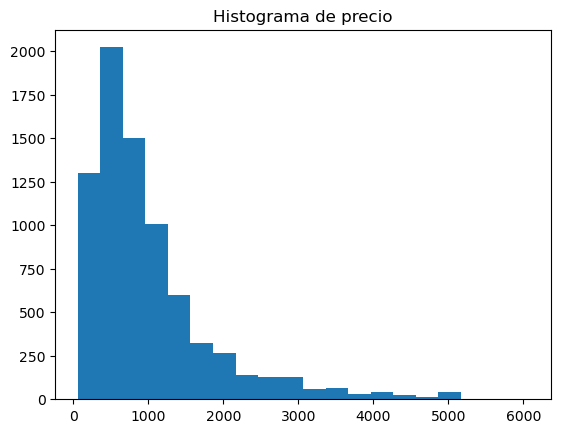

In [27]:
# Ajustamos la escala del eje Y para mostrar números completos ( sin notación cientifica por default)
plt.ticklabel_format(style='plain', axis='y')


plt.title('Histograma de precio')
plt.hist(df['price'], bins=20)
plt.show()

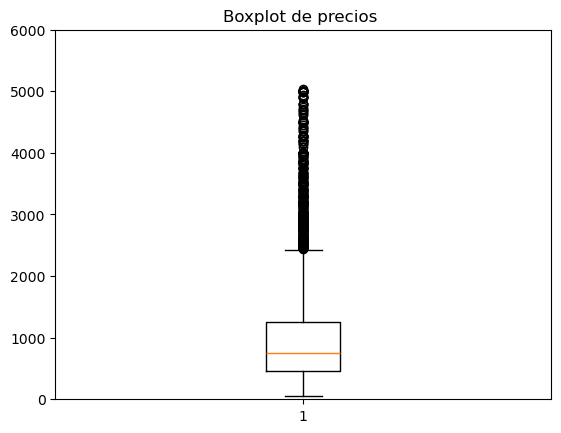

In [28]:
plt.boxplot(df['price'].dropna()) # quitamos los nan para evitar anomalias 
plt.ylim(0, 6000)  # Ajustamos los límites según los valores del dataset
plt.title('Boxplot de precios ')
plt.show()


### Limpieza de datos utilizando el IQR

Identificación/tratamiento de Outliers:

In [29]:
# Calcular el rango intercuartílico (IQR)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para mantener solo los valores dentro de los límites
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

Volvemos a graficar la variable trás el tratamiento de los Outliers


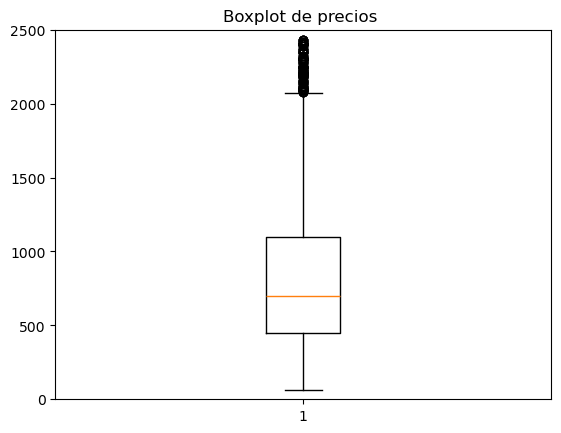

In [30]:
plt.boxplot(df_filtered['price'].dropna()) # quitamos los nan para evitar anomalias 
plt.ylim(0, 2500)  # Ajustamos los límites según los valores del dataset
plt.title('Boxplot de precios ')
plt.show()

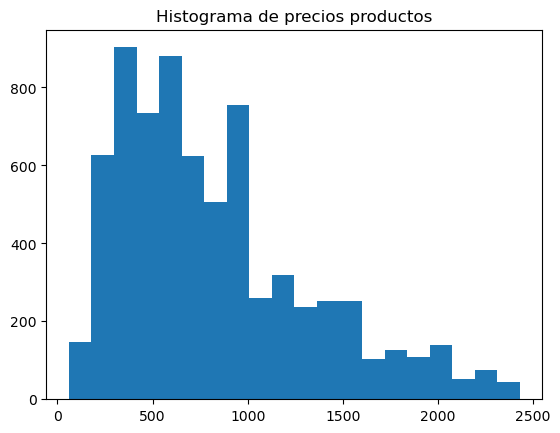

In [31]:
# Ajustamos la escala del eje Y para mostrar números completos ( sin notación cientifica por default)
plt.ticklabel_format(style='plain', axis='y')


# Histograma 
plt.title('Histograma de precios productos')
plt.hist(df_filtered['price'], bins=20)
plt.show()

In [32]:
df_filtered['price'].describe().round(2)

count    7148.00
mean      828.86
std       505.84
min        60.00
25%       450.00
50%       700.00
75%      1100.00
max      2430.00
Name: price, dtype: float64

In [33]:
df[['price']].var().round(2)

price    698507.55
dtype: float64

Verificamos dispersión de la variable price

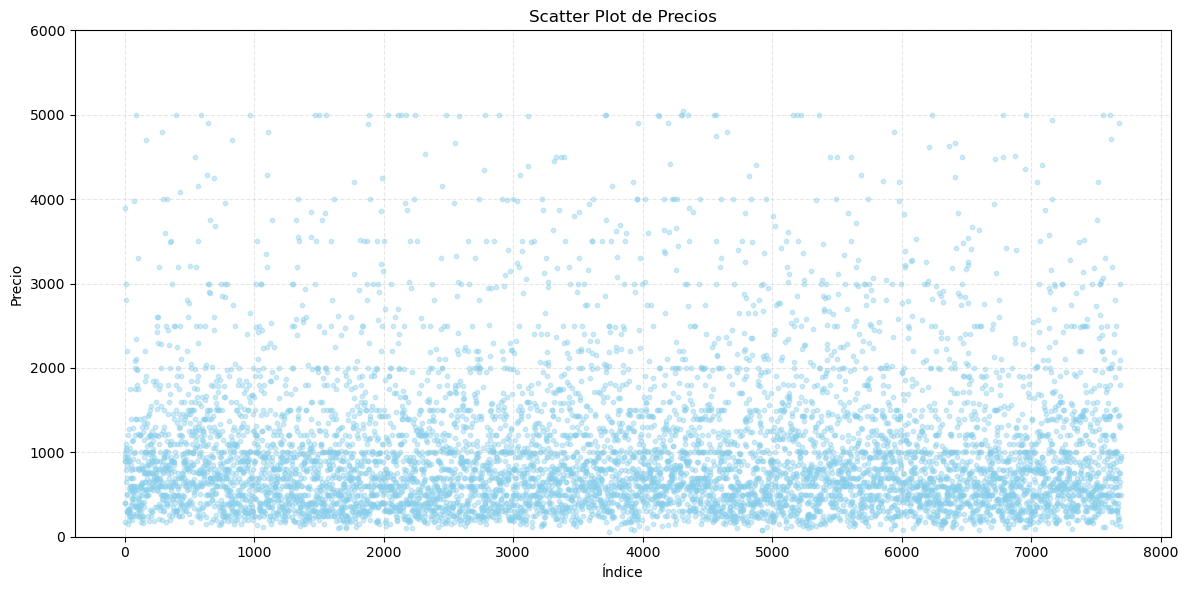

In [34]:
# Eliminamos los NaN
price_nonan = df['price'].dropna()

plt.figure(figsize=(12, 6))
plt.scatter(price_nonan.index, price_nonan, alpha=0.4, color='skyblue', s=10)
plt.ylim(0, 6000)
plt.title('Scatter Plot de Precios')
plt.xlabel('Índice')
plt.ylabel('Precio')
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


### Boxplot availability 

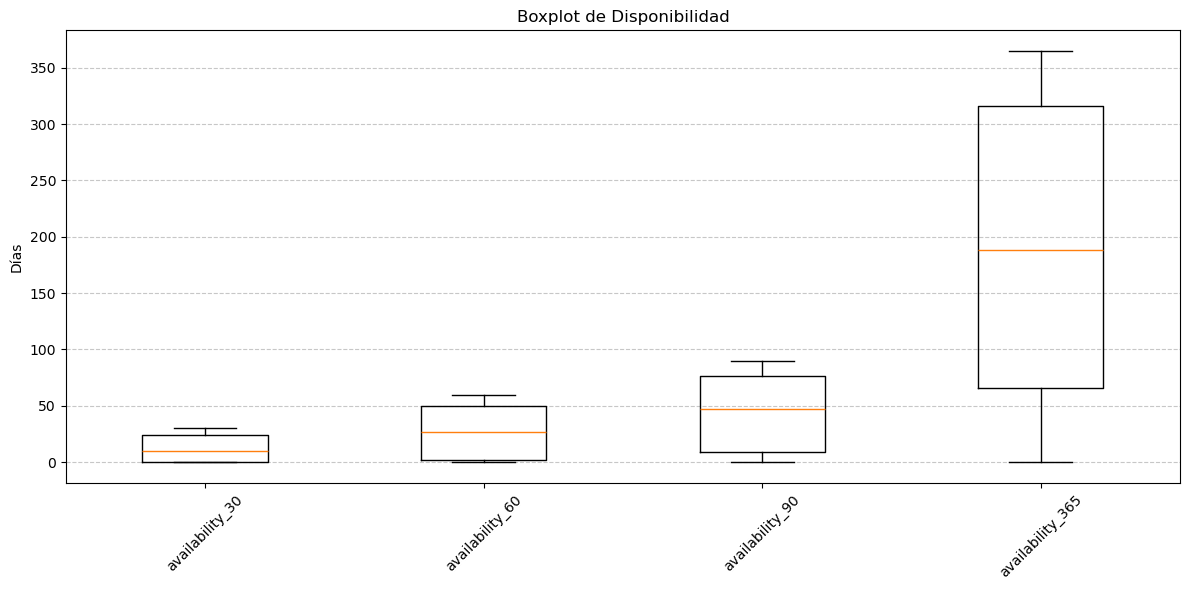

In [35]:
# Lista de variables
variables = ['availability_30', 'availability_60', 'availability_90', 'availability_365']

# Crear el boxplot
plt.figure(figsize=(12, 6))
plt.boxplot([df[var].dropna() for var in variables], labels=variables)
plt.title('Boxplot de Disponibilidad')
plt.ylabel('Días')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## EDA Operaciones

In [36]:
df

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date
0,11964,A ROOM WITH A VIEW,Private bedroom in our attic apartment. Right ...,45553,Centro,None,Private room,2,2.0,1.0,...,100.0,100.0,100.0,100.0,100.0,FALSO,75.0,spain,malaga,2018-07-31
1,21853,Bright and airy room,We have a quiet and sunny room with a good vie...,83531,C�rmenes,Latina,Private room,1,1.0,1.0,...,90.0,100.0,100.0,80.0,90.0,FALSO,52.0,spain,madrid,2020-01-10
2,32347,Explore Cultural Sights from a Family-Friendly...,Open French doors and step onto a plant-filled...,139939,San Vicente,Casco Antiguo,Entire home/apt,4,1.0,2.0,...,100.0,100.0,100.0,100.0,100.0,VERDADERO,142.0,spain,sevilla,2019-07-29
3,35379,Double 02 CasanovaRooms Barcelona,Room at a my apartment. Kitchen and 2 bathroom...,152232,l'Antiga Esquerra de l'Eixample,Eixample,Private room,2,2.0,1.0,...,90.0,100.0,100.0,100.0,90.0,VERDADERO,306.0,spain,barcelona,2020-01-10
4,35801,Can Torras Farmhouse Studio Suite,Lay in bed & watch sunlight change the mood of...,153805,Quart,None,Private room,5,1.0,2.0,...,100.0,100.0,100.0,100.0,100.0,FALSO,39.0,spain,girona,2019-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7688,32392193,Espectacular habitaci�n,None,238089984,Sant Antoni,Eixample,Private room,1,1.0,1.0,...,90.0,100.0,100.0,100.0,90.0,VERDADERO,88.0,spain,barcelona,2019-10-16
7689,32392774,? Tu Hogar de Lujo ????? en el Centro de Sevilla,"Exclusivo, amplio y luminoso alojamiento situa...",243246681,Arenal,Casco Antiguo,Entire home/apt,6,2.0,3.0,...,100.0,100.0,100.0,100.0,100.0,FALSO,157.0,spain,sevilla,2021-01-31
7690,32395123,Rooms by G Bella Mar�a 3,The 2-star Bella Maria has 24-hourreception an...,159933359,Felanitx,None,Entire home/apt,2,1.0,1.0,...,100.0,100.0,100.0,100.0,90.0,VERDADERO,25.0,spain,mallorca,2019-04-24
7691,32407332,LUMINOSO Y ENCANTADOR PISO CERCA DE TODO,PISO MUY ILUMINADO CON UNA TERRAZA ESTUPENDA C...,187631805,Proven�als del Poblenou,Sant Mart�,Private room,3,2.0,2.0,...,100.0,100.0,100.0,100.0,100.0,VERDADERO,389.0,spain,barcelona,2019-08-12


Crear dataset Operaciones

In [38]:
df_op = df[['apartment_id','host_id','country','city','neighbourhood_name','neighbourhood_district','accommodates','room_type','description','amenities_list','beds','bedrooms','bathrooms','minimum_nights','maximum_nights','is_instant_bookable','availability_30','availability_60','availability_90','availability_365','price','insert_date']]

df_op

,apartment_id,host_id,country,city,neighbourhood_name,neighbourhood_district,accommodates,room_type,description,amenities_list,...,bathrooms,minimum_nights,maximum_nights,is_instant_bookable,availability_30,availability_60,availability_90,availability_365,price,insert_date
0,11964,45553,spain,malaga,Centro,None,2,Private room,Private bedroom in our attic apartment. Right ...,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",...,2.0,3,365,FALSO,7,20,40,130,400.0,2018-07-31
1,21853,83531,spain,madrid,C�rmenes,Latina,1,Private room,We have a quiet and sunny room with a good vie...,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",...,1.0,4,40,FALSO,0,0,0,162,170.0,2020-01-10
2,32347,139939,spain,sevilla,San Vicente,Casco Antiguo,4,Entire home/apt,Open French doors and step onto a plant-filled...,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",...,1.0,2,120,VERDADERO,26,31,31,270,990.0,2019-07-29
3,35379,152232,spain,barcelona,l'Antiga Esquerra de l'Eixample,Eixample,2,Private room,Room at a my apartment. Kitchen and 2 bathroom...,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",...,2.0,2,730,VERDADERO,9,23,49,300,400.0,2020-01-10
4,35801,153805,spain,girona,Quart,None,5,Private room,Lay in bed & watch sunlight change the mood of...,"Wifi,Pool,Free parking on premises,Breakfast,P...",...,1.0,1,180,FALSO,0,19,49,312,900.0,2019-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7688,32392193,238089984,spain,barcelona,Sant Antoni,Eixample,1,Private room,None,"TV,Wifi,Elevator,Heating,Washer,Essentials,Sha...",...,1.0,32,1125,VERDADERO,28,58,88,363,3000.0,2019-10-16
7689,32392774,243246681,spain,sevilla,Arenal,Casco Antiguo,6,Entire home/apt,"Exclusivo, amplio y luminoso alojamiento situa...","Patio or balcony, Long term stays allowed, Sha...",...,2.0,2,60,FALSO,0,11,41,41,2090.0,2021-01-31
7690,32395123,159933359,spain,mallorca,Felanitx,None,2,Entire home/apt,The 2-star Bella Maria has 24-hourreception an...,"Air conditioning,Pool,Kitchen,Free parking on ...",...,1.0,1,1125,VERDADERO,23,53,83,184,930.0,2019-04-24
7691,32407332,187631805,spain,barcelona,Proven�als del Poblenou,Sant Mart�,3,Private room,PISO MUY ILUMINADO CON UNA TERRAZA ESTUPENDA C...,"TV,Wifi,Air conditioning,Kitchen,Free parking ...",...,2.0,2,15,VERDADERO,1,17,40,315,960.0,2019-08-12


Crear nuevas columnas ( mes, año, trimestre)

In [39]:
# Create new columns
df_op['month'] = df_op['insert_date'].dt.month  # Numeric month (1-12)
df_op['month_name'] = df_op['insert_date'].dt.month_name()  # Name of the month
df_op['quarter'] = df_op['insert_date'].dt.quarter  # Quarter (1-4)
df_op['year'] = df_op['insert_date'].dt.year  # Year


In [40]:
df_op

,apartment_id,host_id,country,city,neighbourhood_name,neighbourhood_district,accommodates,room_type,description,amenities_list,...,availability_30,availability_60,availability_90,availability_365,price,insert_date,month,month_name,quarter,year
0,11964,45553,spain,malaga,Centro,None,2,Private room,Private bedroom in our attic apartment. Right ...,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",...,7,20,40,130,400.0,2018-07-31,7,July,3,2018
1,21853,83531,spain,madrid,C�rmenes,Latina,1,Private room,We have a quiet and sunny room with a good vie...,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",...,0,0,0,162,170.0,2020-01-10,1,January,1,2020
2,32347,139939,spain,sevilla,San Vicente,Casco Antiguo,4,Entire home/apt,Open French doors and step onto a plant-filled...,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",...,26,31,31,270,990.0,2019-07-29,7,July,3,2019
3,35379,152232,spain,barcelona,l'Antiga Esquerra de l'Eixample,Eixample,2,Private room,Room at a my apartment. Kitchen and 2 bathroom...,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",...,9,23,49,300,400.0,2020-01-10,1,January,1,2020
4,35801,153805,spain,girona,Quart,None,5,Private room,Lay in bed & watch sunlight change the mood of...,"Wifi,Pool,Free parking on premises,Breakfast,P...",...,0,19,49,312,900.0,2019-02-19,2,February,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7688,32392193,238089984,spain,barcelona,Sant Antoni,Eixample,1,Private room,None,"TV,Wifi,Elevator,Heating,Washer,Essentials,Sha...",...,28,58,88,363,3000.0,2019-10-16,10,October,4,2019
7689,32392774,243246681,spain,sevilla,Arenal,Casco Antiguo,6,Entire home/apt,"Exclusivo, amplio y luminoso alojamiento situa...","Patio or balcony, Long term stays allowed, Sha...",...,0,11,41,41,2090.0,2021-01-31,1,January,1,2021
7690,32395123,159933359,spain,mallorca,Felanitx,None,2,Entire home/apt,The 2-star Bella Maria has 24-hourreception an...,"Air conditioning,Pool,Kitchen,Free parking on ...",...,23,53,83,184,930.0,2019-04-24,4,April,2,2019
7691,32407332,187631805,spain,barcelona,Proven�als del Poblenou,Sant Mart�,3,Private room,PISO MUY ILUMINADO CON UNA TERRAZA ESTUPENDA C...,"TV,Wifi,Air conditioning,Kitchen,Free parking ...",...,1,17,40,315,960.0,2019-08-12,8,August,3,2019


In [41]:
df_op.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7693 entries, 0 to 7692
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   apartment_id            7693 non-null   int64         
 1   host_id                 7693 non-null   int64         
 2   country                 7693 non-null   object        
 3   city                    7693 non-null   object        
 4   neighbourhood_name      7693 non-null   object        
 5   neighbourhood_district  4669 non-null   object        
 6   accommodates            7693 non-null   int64         
 7   room_type               7693 non-null   object        
 8   description             7643 non-null   object        
 9   amenities_list          7677 non-null   object        
 10  beds                    7693 non-null   float64       
 11  bedrooms                7693 non-null   float64       
 12  bathrooms               7693 non-null   float64 

In [42]:
df_op.describe().round(2)

,apartment_id,host_id,accommodates,beds,bedrooms,bathrooms,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,price,insert_date,month,quarter,year
count,7693.00,7.693000e+03,7693.00,7693.00,7693.00,7693.00,7693.00,7693.00,7693.00,7693.00,7693.00,7693.00,7693.00,7693,7693.00,7693.00,7693.00
mean,16972832.94,7.097831e+07,4.32,2.97,1.95,1.60,4.58,759.40,12.40,27.60,44.57,187.70,1007.70,2019-05-17 03:57:32.125308928,6.45,2.50,2018.87
min,11964.00,1.070400e+04,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,60.00,2017-01-04 00:00:00,1.00,1.00,2017.00
25%,10757653.00,1.203042e+07,2.00,1.00,1.00,1.00,1.00,61.00,0.00,2.00,9.00,66.00,460.00,2018-09-11 00:00:00,3.00,1.00,2018.00
50%,18086264.00,4.874612e+07,4.00,2.00,2.00,1.00,2.00,1125.00,10.00,27.00,47.00,188.00,750.00,2019-05-27 00:00:00,6.00,2.00,2019.00
75%,23635900.00,1.186833e+08,6.00,4.00,3.00,2.00,4.00,1125.00,24.00,50.00,76.00,316.00,1250.00,2020-02-29 00:00:00,10.00,4.00,2020.00
max,32423292.00,3.365242e+08,29.00,30.00,16.00,12.00,365.00,1125.00,30.00,60.00,90.00,365.00,6071.00,2021-02-27 00:00:00,12.00,4.00,2021.00
std,8745041.62,6.569531e+07,2.60,2.30,1.29,0.98,11.96,498.53,11.55,22.48,33.10,129.89,835.77,NaN,3.51,1.13,1.03


In [43]:
df_op['accommodates'].var()

6.751581101850965

In [44]:
df_op['accommodates'].mode()

0    2
Name: accommodates, dtype: int64

In [45]:
df_op['minimum_nights'].mode()

0    1
Name: minimum_nights, dtype: int64

In [46]:
df_op['maximum_nights'].mode()

0    1125
Name: maximum_nights, dtype: int64

Boxplot e Histogramas de la variable accommodates

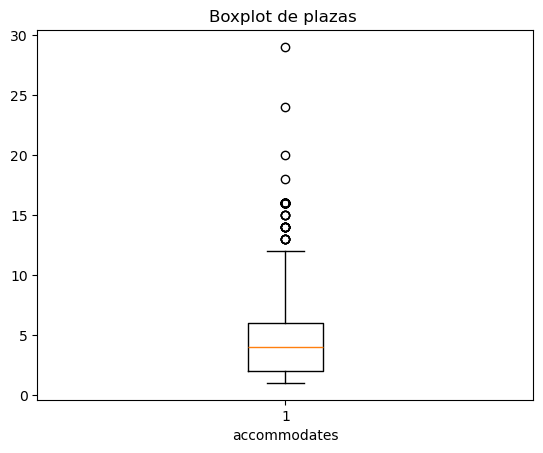

In [47]:
plt.boxplot(df_op['accommodates'])
plt.title('Boxplot de plazas ')
plt.xlabel('accommodates')
plt.show()

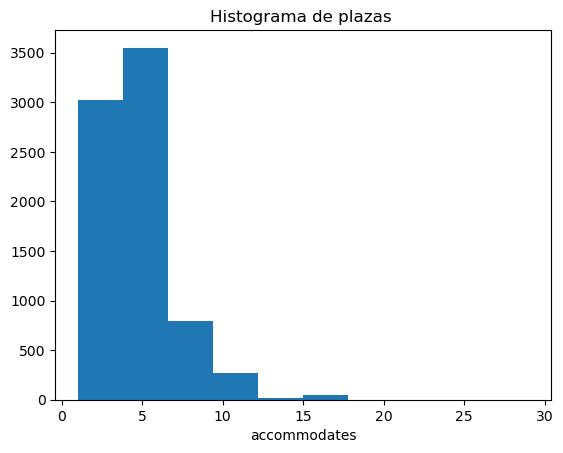

In [48]:
plt.hist(df_op['accommodates'])
plt.title('Histograma de plazas ')
plt.xlabel('accommodates')
plt.show()

Boxplots de numero de Camas, Dormitorios y Baños

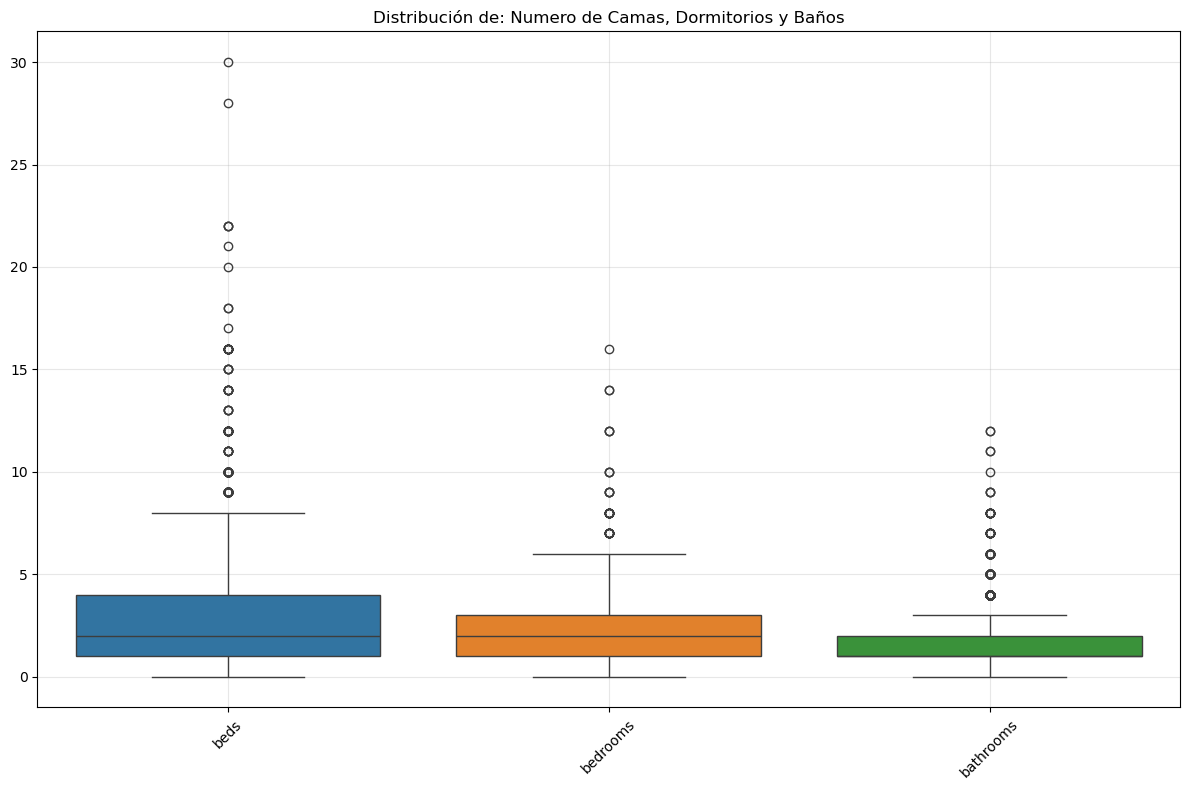

In [49]:


plt.figure(figsize=(12, 8))
sns.boxplot(data=df_op[[ 'beds', 'bedrooms', 'bathrooms']])
plt.title('Distribución de: Numero de Camas, Dormitorios y Baños')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Histogramas de Camas, Dormitorios y Baños

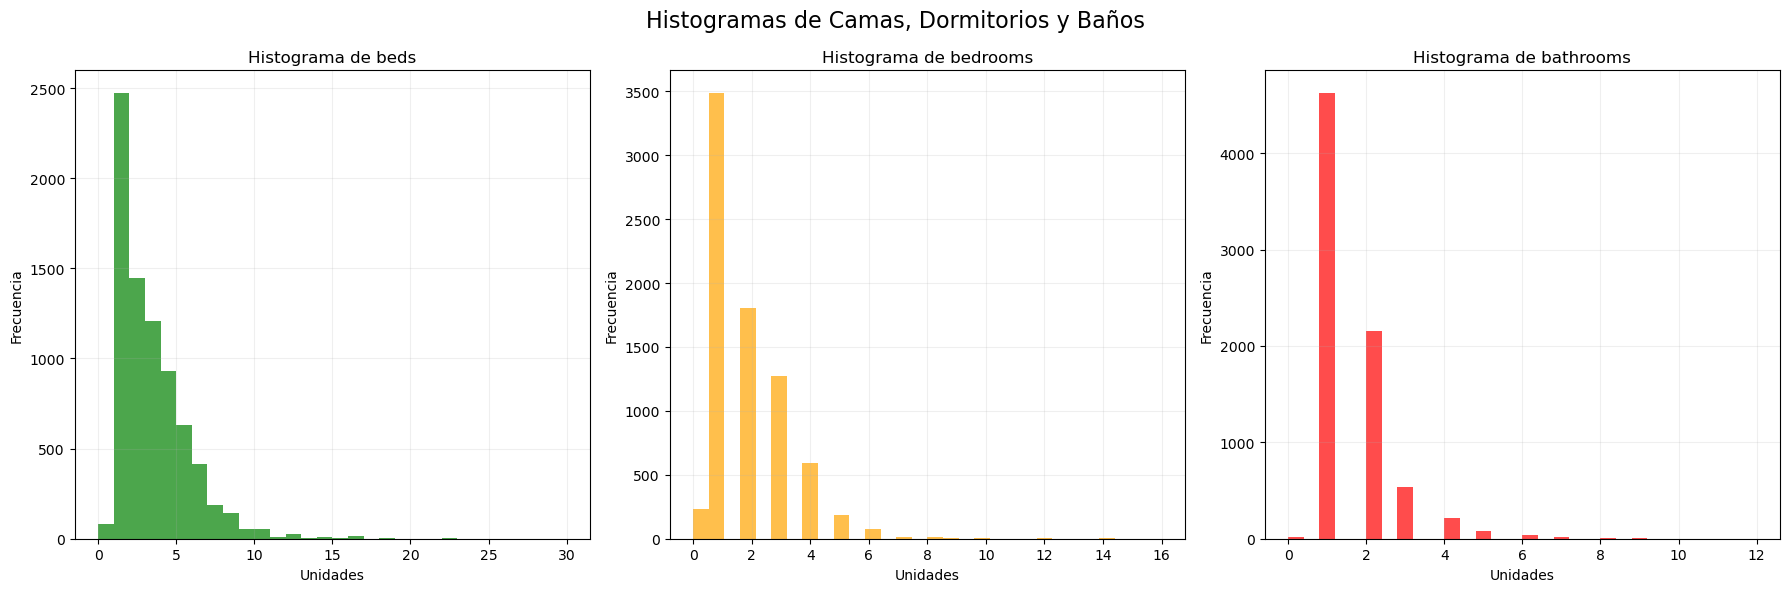

In [50]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

variables = ['beds', 'bedrooms', 'bathrooms']
colors = ['green', 'orange', 'red']

for i, var in enumerate(variables):
    ax = axes[i]
    ax.hist(df_op[var], bins=30, color=colors[i], alpha=0.7)
    ax.set_title(f'Histograma de {var}')
    ax.grid(alpha=0.2)
    ax.set_xlabel('Unidades')
    ax.set_ylabel('Frecuencia')

plt.suptitle('Histogramas de Camas, Dormitorios y Baños', fontsize=16)
plt.tight_layout()
plt.show()


Averiguar distribución normal de las variables

In [51]:
from scipy.stats import shapiro

# Seleccionar las columnas de interés
columns_to_test = ['accommodates', 'beds', 'bedrooms', 'bathrooms']

# Iterar sobre las columnas y realizar el Shapiro-Wilk Test
for col in columns_to_test:
    stat, p_value = shapiro(df_op[col])
    print(f"{col}: W-statistic = {stat:.4f}, p-value = {p_value:.4f}")

    if p_value < 0.05:
        print(f"La variable {col} no sigue una distribución normal")
    else:
        print(f"La variable {col} sigue una distribución normal")
    print('-' * 50)


accommodates: W-statistic = 0.8883, p-value = 0.0000
La variable accommodates no sigue una distribución normal
--------------------------------------------------
beds: W-statistic = 0.8048, p-value = 0.0000
La variable beds no sigue una distribución normal
--------------------------------------------------
bedrooms: W-statistic = 0.8113, p-value = 0.0000
La variable bedrooms no sigue una distribución normal
--------------------------------------------------
bathrooms: W-statistic = 0.6389, p-value = 0.0000
La variable bathrooms no sigue una distribución normal
--------------------------------------------------


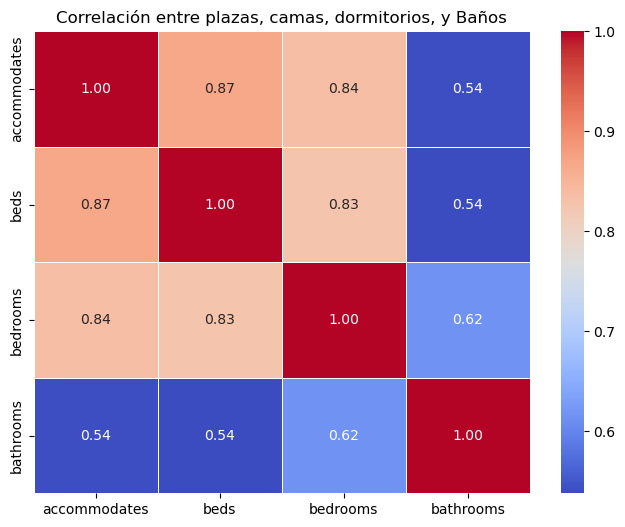

In [52]:


# Selecciona las columnas numéricas de interés
correlation_columns = ['accommodates', 'beds', 'bedrooms', 'bathrooms']

# Calcula la matriz de correlación
corr_matrix = df_op[correlation_columns].corr(method='spearman')

# Graficar el heatmap de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlación entre plazas, camas, dormitorios, y Baños')
plt.show()


Distribución de la variable room_type

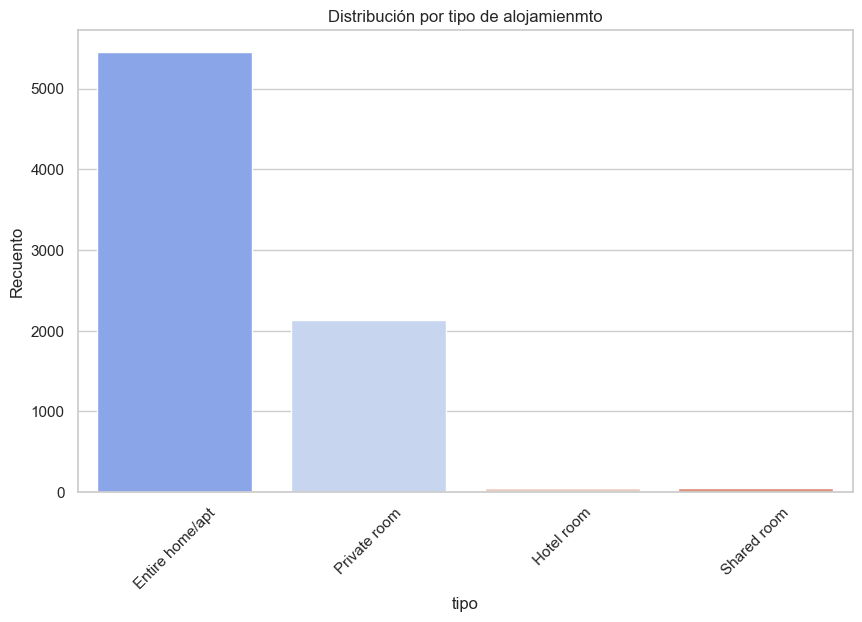

In [53]:


# Configuración del estilo de Seaborn
sns.set(style="whitegrid")

# Distribución de room_type
plt.figure(figsize=(10, 6))
sns.countplot(data=df_op, x='room_type', palette='coolwarm', order=df_op['room_type'].value_counts().index)
plt.title('Distribución por tipo de alojamienmto')
plt.xticks(rotation=45)
plt.xlabel('tipo')
plt.ylabel('Recuento')
plt.show()


Comparación de room_type con Variables Numéricas (Boxplot):
vemos cómo se distribuyen accommodates, beds y bathrooms por tipo de Alojamiento:

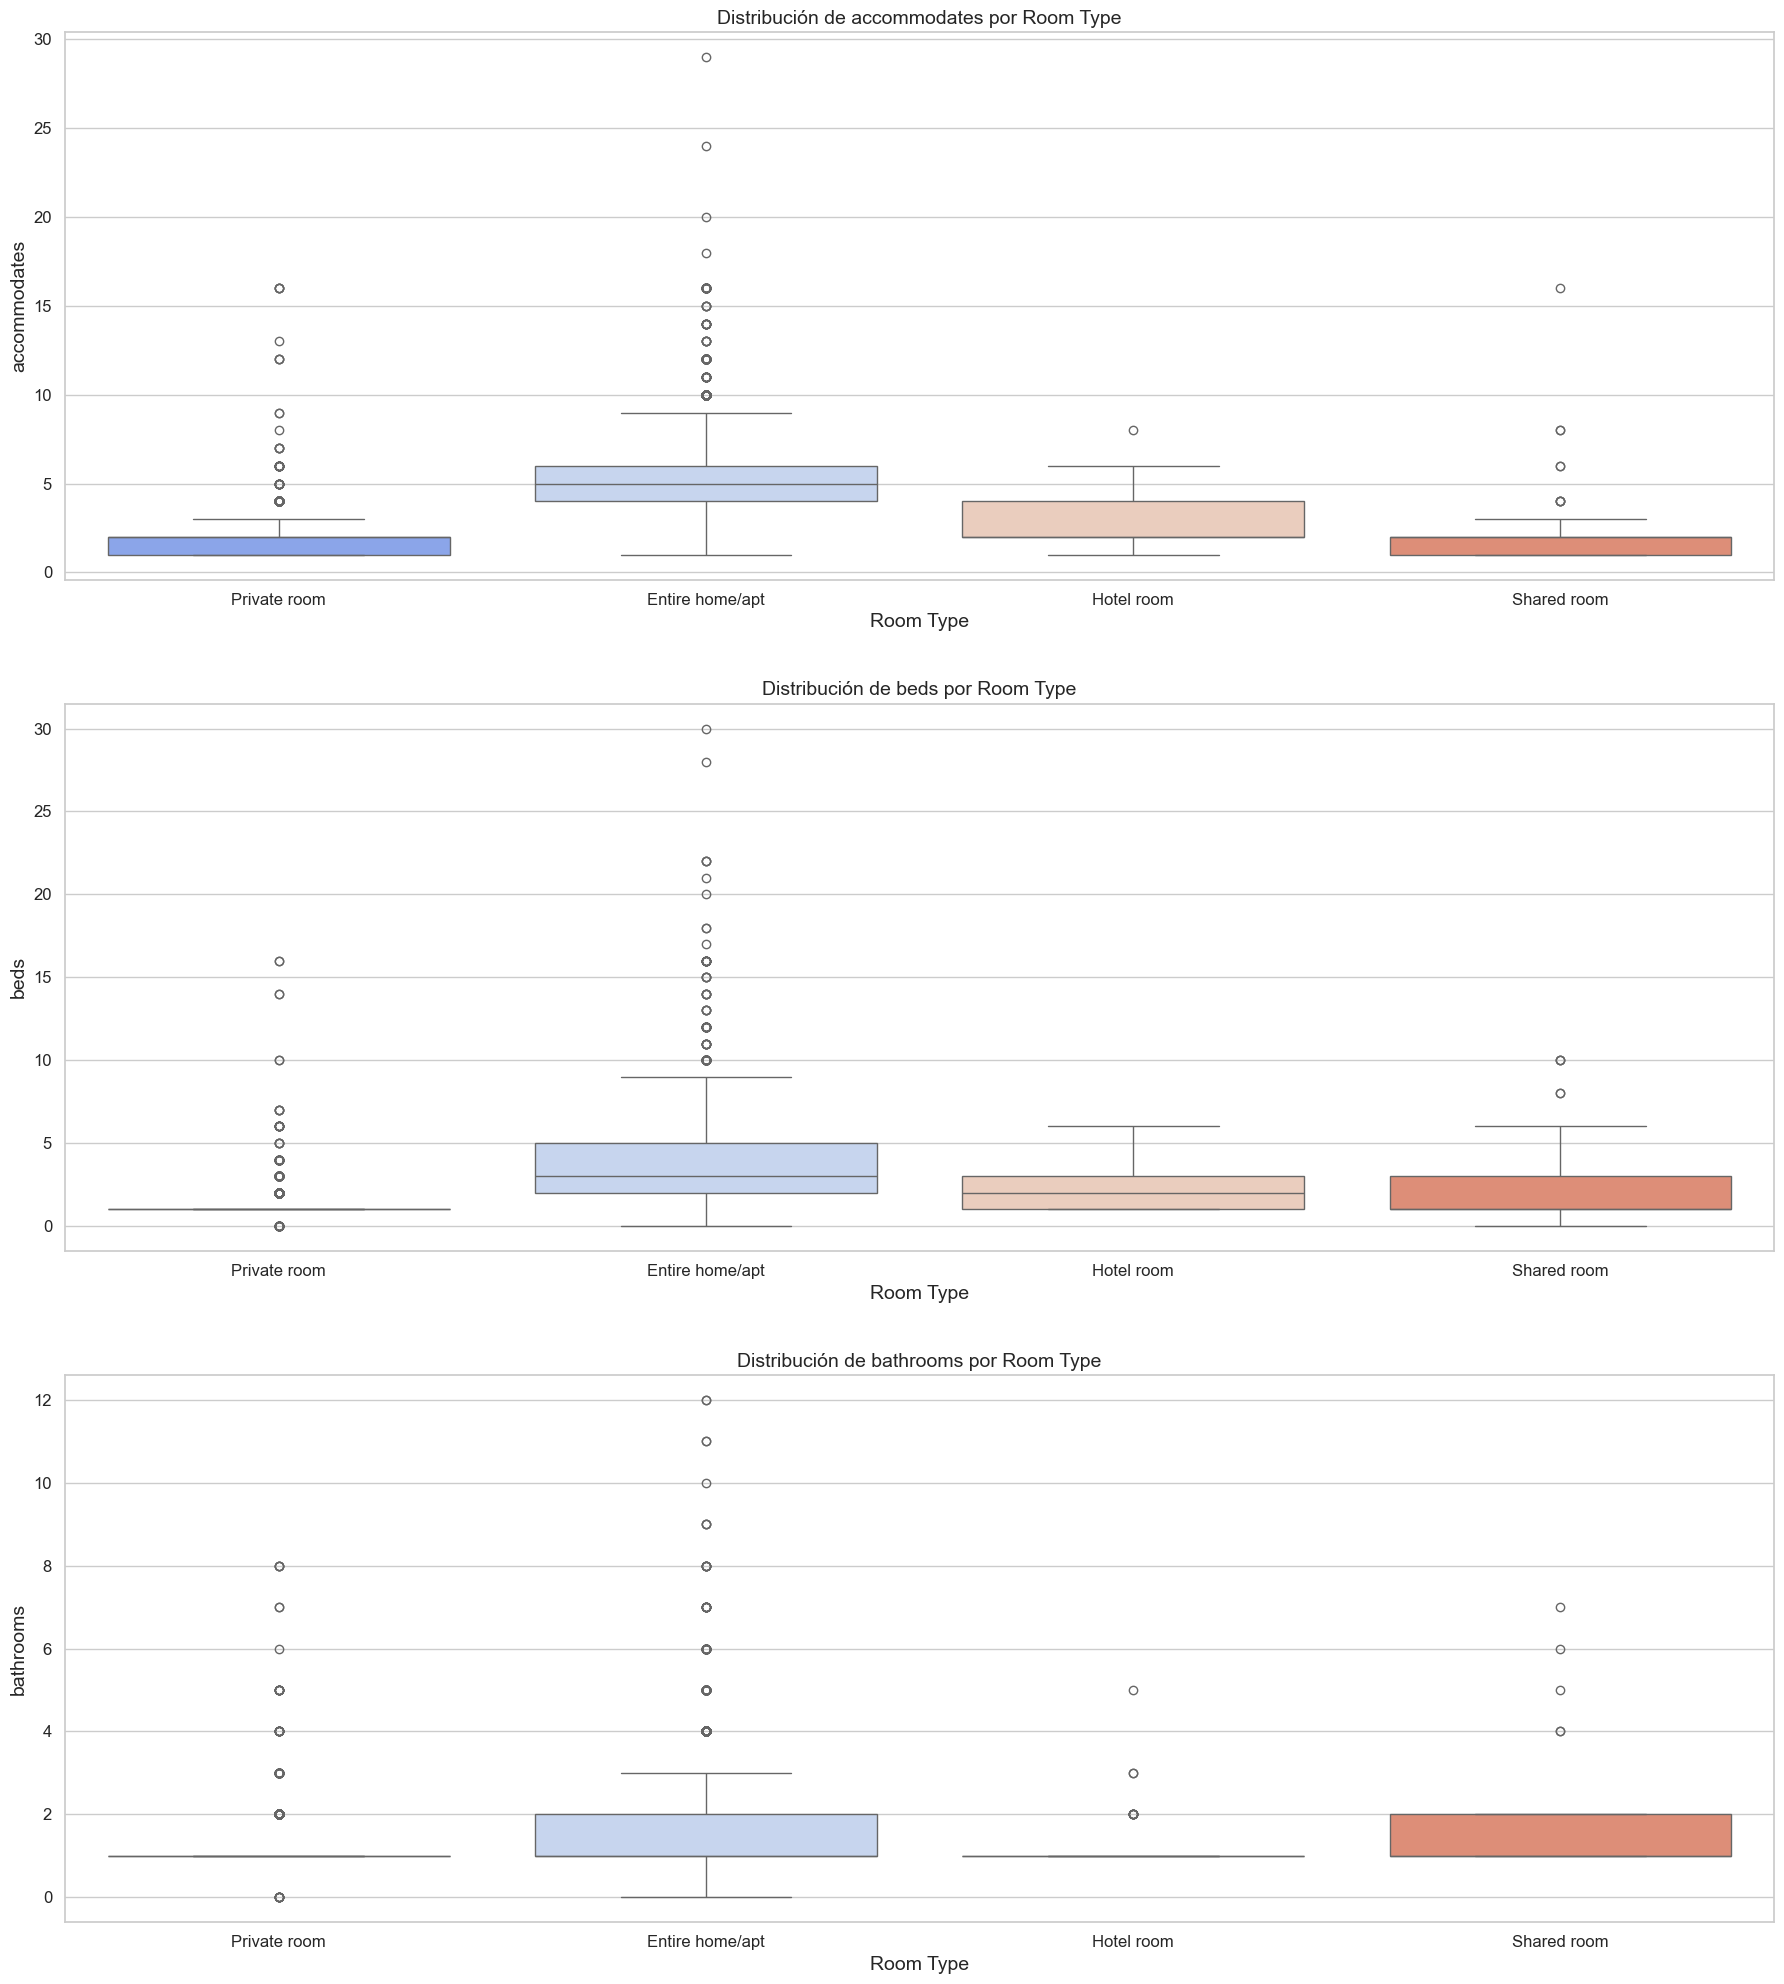

In [54]:
# Variables numéricas a comparar
num_vars = ['accommodates', 'beds', 'bathrooms']

# Ajuste del tamaño del gráfico 
plt.figure(figsize=(18, 20))  

for i, var in enumerate(num_vars, 1):
    plt.subplot(len(num_vars), 1, i)
    sns.boxplot(data=df_op, x='room_type', y=var, palette='coolwarm')
    plt.title(f'Distribución de {var} por Room Type', fontsize=14)
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Room Type', fontsize=14)
    plt.ylabel(var, fontsize=14)
    plt.tight_layout(h_pad=3)  

plt.show()


Conteo de tipo de alojamiento por ciudad

In [55]:


# Agrupar por 'city' y 'room_type' para obtener el conteo
room_city_count = df_op.groupby(['city', 'room_type']).size().reset_index(name='count')

# Crear el gráfico de barras apiladas
fig = px.bar(room_city_count, x='city', y='count', color='room_type', 
             title='Recuento de tipo de alojamiento por Ciudad', 
             labels={'city': 'City'}, 
             height=600, barmode='stack')

# Configurar el gráfico
fig.update_layout(xaxis_title='Ciudad', yaxis_title='Conteo', xaxis_tickangle=45)

fig.show()


Numero de Alojamientos registrados por Día

In [56]:
# Contar alojamientos por día
alojamientos_por_dia = df_op['insert_date'].dt.date.value_counts().sort_index()

# Crear DataFrame para Plotly
df_dia = alojamientos_por_dia.reset_index()
df_dia.columns = ['Fecha', 'Cantidad']

fig = px.line(df_dia, x='Fecha', y='Cantidad', 
              title='Numero de Alojamientos registrados por Día',
              markers=True,
              template='plotly_dark')
fig.update_layout(xaxis_title='Fecha', yaxis_title='Cantidad de Alojamientos')
fig.show()

Media de disponibilidad global ( 30/60/90/365)

In [57]:

media_disp_glob = df_op[['availability_30', 'availability_60', 'availability_90', 'availability_365']].mean().reset_index(name= 'Media_dispo_global_dias').round(2)

media_disp_glob 


,index,Media_dispo_global_dias
0,availability_30,12.40
1,availability_60,27.60
2,availability_90,44.57
3,availability_365,187.70


Media de disponibilidad por ciudad ( 30/60/90/365)

In [58]:
media_disp_ciudad = df_op.groupby('city')[['availability_30', 'availability_60', 'availability_90', 'availability_365']].agg('mean').round(2).reset_index()

media_disp_ciudad 

,city,availability_30,availability_60,availability_90,availability_365
0,barcelona,11.25,25.91,42.95,183.79
1,girona,14.61,31.06,48.00,193.97
2,madrid,10.76,24.83,41.02,165.81
3,malaga,12.48,28.72,47.44,202.62
4,mallorca,13.47,28.75,45.28,210.90
5,menorca,14.52,30.11,46.37,194.56
6,sevilla,14.34,31.41,50.72,197.37
7,valencia,12.90,28.58,46.12,179.62


In [59]:

# Crear el gráfico de barras agrupadas
fig = px.bar(
    media_disp_ciudad,
    x='city',
    y=['availability_30', 'availability_60', 'availability_90', 'availability_365'],
    title='Media de Disponibilidad por Ciudad',
    labels={'value': 'Media de Disponibilidad', 'city': 'Ciudad'},
    height=600
)

# barras agrupadas
fig.update_layout(barmode='group')

fig.show()


### Tasa de ocupación Mensual

Crear columnas ocupación 30/60/90/365

In [60]:

for period in [30, 60, 90, 365]:
    column_name = f'occupied_days_{period}'
    availability_col = f'availability_{period}'
    
    if availability_col in df_op.columns:
        df_op[column_name] = period - df_op[availability_col]

df_op


,apartment_id,host_id,country,city,neighbourhood_name,neighbourhood_district,accommodates,room_type,description,amenities_list,...,price,insert_date,month,month_name,quarter,year,occupied_days_30,occupied_days_60,occupied_days_90,occupied_days_365
0,11964,45553,spain,malaga,Centro,None,2,Private room,Private bedroom in our attic apartment. Right ...,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",...,400.0,2018-07-31,7,July,3,2018,23,40,50,235
1,21853,83531,spain,madrid,C�rmenes,Latina,1,Private room,We have a quiet and sunny room with a good vie...,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",...,170.0,2020-01-10,1,January,1,2020,30,60,90,203
2,32347,139939,spain,sevilla,San Vicente,Casco Antiguo,4,Entire home/apt,Open French doors and step onto a plant-filled...,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",...,990.0,2019-07-29,7,July,3,2019,4,29,59,95
3,35379,152232,spain,barcelona,l'Antiga Esquerra de l'Eixample,Eixample,2,Private room,Room at a my apartment. Kitchen and 2 bathroom...,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",...,400.0,2020-01-10,1,January,1,2020,21,37,41,65
4,35801,153805,spain,girona,Quart,None,5,Private room,Lay in bed & watch sunlight change the mood of...,"Wifi,Pool,Free parking on premises,Breakfast,P...",...,900.0,2019-02-19,2,February,1,2019,30,41,41,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7688,32392193,238089984,spain,barcelona,Sant Antoni,Eixample,1,Private room,None,"TV,Wifi,Elevator,Heating,Washer,Essentials,Sha...",...,3000.0,2019-10-16,10,October,4,2019,2,2,2,2
7689,32392774,243246681,spain,sevilla,Arenal,Casco Antiguo,6,Entire home/apt,"Exclusivo, amplio y luminoso alojamiento situa...","Patio or balcony, Long term stays allowed, Sha...",...,2090.0,2021-01-31,1,January,1,2021,30,49,49,324
7690,32395123,159933359,spain,mallorca,Felanitx,None,2,Entire home/apt,The 2-star Bella Maria has 24-hourreception an...,"Air conditioning,Pool,Kitchen,Free parking on ...",...,930.0,2019-04-24,4,April,2,2019,7,7,7,181
7691,32407332,187631805,spain,barcelona,Proven�als del Poblenou,Sant Mart�,3,Private room,PISO MUY ILUMINADO CON UNA TERRAZA ESTUPENDA C...,"TV,Wifi,Air conditioning,Kitchen,Free parking ...",...,960.0,2019-08-12,8,August,3,2019,29,43,50,50


Crear columna tasa de ocupación 

In [61]:
# Crear columnas de tasa de ocupación para 30, 60, 90, 365 días
for period in [30, 60, 90, 365]:
    availability_col = f'availability_{period}'
    occupied_col = f'occupied_days_{period}'
    occupancy_rate_col = f'occupancy_rate_%_{period}'
    
    if availability_col in df_op.columns:
        # Calcular la tasa de ocupación en porcentaje
        df_op[occupancy_rate_col] = ((df_op[occupied_col] / period) * 100).round(2)

df_op



,apartment_id,host_id,country,city,neighbourhood_name,neighbourhood_district,accommodates,room_type,description,amenities_list,...,quarter,year,occupied_days_30,occupied_days_60,occupied_days_90,occupied_days_365,occupancy_rate_%_30,occupancy_rate_%_60,occupancy_rate_%_90,occupancy_rate_%_365
0,11964,45553,spain,malaga,Centro,None,2,Private room,Private bedroom in our attic apartment. Right ...,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",...,3,2018,23,40,50,235,76.67,66.67,55.56,64.38
1,21853,83531,spain,madrid,C�rmenes,Latina,1,Private room,We have a quiet and sunny room with a good vie...,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",...,1,2020,30,60,90,203,100.00,100.00,100.00,55.62
2,32347,139939,spain,sevilla,San Vicente,Casco Antiguo,4,Entire home/apt,Open French doors and step onto a plant-filled...,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",...,3,2019,4,29,59,95,13.33,48.33,65.56,26.03
3,35379,152232,spain,barcelona,l'Antiga Esquerra de l'Eixample,Eixample,2,Private room,Room at a my apartment. Kitchen and 2 bathroom...,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",...,1,2020,21,37,41,65,70.00,61.67,45.56,17.81
4,35801,153805,spain,girona,Quart,None,5,Private room,Lay in bed & watch sunlight change the mood of...,"Wifi,Pool,Free parking on premises,Breakfast,P...",...,1,2019,30,41,41,53,100.00,68.33,45.56,14.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7688,32392193,238089984,spain,barcelona,Sant Antoni,Eixample,1,Private room,None,"TV,Wifi,Elevator,Heating,Washer,Essentials,Sha...",...,4,2019,2,2,2,2,6.67,3.33,2.22,0.55
7689,32392774,243246681,spain,sevilla,Arenal,Casco Antiguo,6,Entire home/apt,"Exclusivo, amplio y luminoso alojamiento situa...","Patio or balcony, Long term stays allowed, Sha...",...,1,2021,30,49,49,324,100.00,81.67,54.44,88.77
7690,32395123,159933359,spain,mallorca,Felanitx,None,2,Entire home/apt,The 2-star Bella Maria has 24-hourreception an...,"Air conditioning,Pool,Kitchen,Free parking on ...",...,2,2019,7,7,7,181,23.33,11.67,7.78,49.59
7691,32407332,187631805,spain,barcelona,Proven�als del Poblenou,Sant Mart�,3,Private room,PISO MUY ILUMINADO CON UNA TERRAZA ESTUPENDA C...,"TV,Wifi,Air conditioning,Kitchen,Free parking ...",...,3,2019,29,43,50,50,96.67,71.67,55.56,13.70


% Ocupación menual Global

In [62]:
df_op['occupancy_rate_%_30'].mean().round(2)

58.65

% Ocupación menual por ciudad

In [63]:
df_op.groupby('city')['occupancy_rate_%_30'].mean().round(2).reset_index().sort_values(by= 'occupancy_rate_%_30', ascending= False)

,city,occupancy_rate_%_30
2,madrid,64.13
0,barcelona,62.51
3,malaga,58.41
7,valencia,56.99
4,mallorca,55.11
6,sevilla,52.18
5,menorca,51.60
1,girona,51.31


Ciudad con mayor Ocupación menual

In [64]:
df_op.groupby('city')['occupancy_rate_%_30'].mean().round(2).nlargest(1).reset_index()

,city,occupancy_rate_%_30
0,madrid,64.13


Disponibilidad media por ciudad ( 30/60/90/365) en días

In [65]:
media_disp_ciudad= df_op.groupby('city')[['availability_30', 'availability_60','availability_90','availability_365']].mean().reset_index().round(2)
media_disp_ciudad

,city,availability_30,availability_60,availability_90,availability_365
0,barcelona,11.25,25.91,42.95,183.79
1,girona,14.61,31.06,48.00,193.97
2,madrid,10.76,24.83,41.02,165.81
3,malaga,12.48,28.72,47.44,202.62
4,mallorca,13.47,28.75,45.28,210.90
5,menorca,14.52,30.11,46.37,194.56
6,sevilla,14.34,31.41,50.72,197.37
7,valencia,12.90,28.58,46.12,179.62


In [66]:
df_op.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7693 entries, 0 to 7692
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   apartment_id            7693 non-null   int64         
 1   host_id                 7693 non-null   int64         
 2   country                 7693 non-null   object        
 3   city                    7693 non-null   object        
 4   neighbourhood_name      7693 non-null   object        
 5   neighbourhood_district  4669 non-null   object        
 6   accommodates            7693 non-null   int64         
 7   room_type               7693 non-null   object        
 8   description             7643 non-null   object        
 9   amenities_list          7677 non-null   object        
 10  beds                    7693 non-null   float64       
 11  bedrooms                7693 non-null   float64       
 12  bathrooms               7693 non-null   float64 

Quin impacte té l'opció de reservar automàticament (sense revisió del propietari) a la disponibilitat mitjana a cada ciutat?

In [67]:
df =df_op
df

,apartment_id,host_id,country,city,neighbourhood_name,neighbourhood_district,accommodates,room_type,description,amenities_list,...,quarter,year,occupied_days_30,occupied_days_60,occupied_days_90,occupied_days_365,occupancy_rate_%_30,occupancy_rate_%_60,occupancy_rate_%_90,occupancy_rate_%_365
0,11964,45553,spain,malaga,Centro,None,2,Private room,Private bedroom in our attic apartment. Right ...,"TV,Internet,Wifi,Air conditioning,Elevator,Buz...",...,3,2018,23,40,50,235,76.67,66.67,55.56,64.38
1,21853,83531,spain,madrid,C�rmenes,Latina,1,Private room,We have a quiet and sunny room with a good vie...,"TV,Internet,Wifi,Air conditioning,Kitchen,Free...",...,1,2020,30,60,90,203,100.00,100.00,100.00,55.62
2,32347,139939,spain,sevilla,San Vicente,Casco Antiguo,4,Entire home/apt,Open French doors and step onto a plant-filled...,"TV,Internet,Wifi,Air conditioning,Wheelchair a...",...,3,2019,4,29,59,95,13.33,48.33,65.56,26.03
3,35379,152232,spain,barcelona,l'Antiga Esquerra de l'Eixample,Eixample,2,Private room,Room at a my apartment. Kitchen and 2 bathroom...,"TV,Internet,Wifi,Kitchen,Breakfast,Elevator,Bu...",...,1,2020,21,37,41,65,70.00,61.67,45.56,17.81
4,35801,153805,spain,girona,Quart,None,5,Private room,Lay in bed & watch sunlight change the mood of...,"Wifi,Pool,Free parking on premises,Breakfast,P...",...,1,2019,30,41,41,53,100.00,68.33,45.56,14.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7688,32392193,238089984,spain,barcelona,Sant Antoni,Eixample,1,Private room,None,"TV,Wifi,Elevator,Heating,Washer,Essentials,Sha...",...,4,2019,2,2,2,2,6.67,3.33,2.22,0.55
7689,32392774,243246681,spain,sevilla,Arenal,Casco Antiguo,6,Entire home/apt,"Exclusivo, amplio y luminoso alojamiento situa...","Patio or balcony, Long term stays allowed, Sha...",...,1,2021,30,49,49,324,100.00,81.67,54.44,88.77
7690,32395123,159933359,spain,mallorca,Felanitx,None,2,Entire home/apt,The 2-star Bella Maria has 24-hourreception an...,"Air conditioning,Pool,Kitchen,Free parking on ...",...,2,2019,7,7,7,181,23.33,11.67,7.78,49.59
7691,32407332,187631805,spain,barcelona,Proven�als del Poblenou,Sant Mart�,3,Private room,PISO MUY ILUMINADO CON UNA TERRAZA ESTUPENDA C...,"TV,Wifi,Air conditioning,Kitchen,Free parking ...",...,3,2019,29,43,50,50,96.67,71.67,55.56,13.70


calcular impacto sobre la disponibioidad mensual de la variable is_instant_bookable

IMPACT = Diferencia absoluta 

IMPACT_% = porcentaje de cambio relativo

interpretación:

En Barcelona, los alojamientos sin reserva automática (FALSO) presentan una disponibilidad media de 11,42 días en los próximos 30 días.
En cambio, aquellos con reserva automática (VERDADERO) tienen una disponibilidad ligeramente menor: 11,05 días.

Esto representa un impacto negativo de -0,36 días, es decir, una disminución del 3,20% en la disponibilidad cuando se activa la opción de reserva instantánea.

📌 Esto podría indicar que los alojamientos con reserva automática tienen una mayor demanda, lo que reduce su disponibilidad.

In [68]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# 1. Agrupar por ciudad y reserva automática
disponibilidad_media_mensual = df.groupby(['city', 'is_instant_bookable'])['availability_30'].mean().reset_index()

# 2. Renombrar para mayor claridad
disponibilidad_media_mensual.rename(columns={'availability_30': 'mean_availability_30'}, inplace=True)

# 3. Pivot para comparación entre FALSO y VERDADERO
pivot_disponibilidad_mensual = disponibilidad_media_mensual.pivot(
    index='city', columns='is_instant_bookable', values='mean_availability_30'
)

# 4. Calcular impacto absoluto y relativo
pivot_disponibilidad_mensual['impact'] = pivot_disponibilidad_mensual['VERDADERO'] - pivot_disponibilidad_mensual['FALSO']
pivot_disponibilidad_mensual['impact_%'] = (pivot_disponibilidad_mensual['impact'] / pivot_disponibilidad_mensual['FALSO']) * 100

# 5. Redondear
pivot_disponibilidad_mensual = pivot_disponibilidad_mensual.round(2).reset_index()

# 6. Preparar datos en formato largo para gráfico
df_melted_disp = pivot_disponibilidad_mensual.melt(
    id_vars='city',
    value_vars=['FALSO', 'VERDADERO'],
    var_name='Reserva Automática',
    value_name='Disponibilidad Media'
)

# 7. Asignar colores personalizados
colores_personalizados = {
    'FALSO': '#8BAE3F',     # verde claro
    'VERDADERO': '#2D6A4F'  # verde oscuro
}

# 8. Gráfico de barras agrupadas
fig_barras = px.bar(
    df_melted_disp,
    x='city',
    y='Disponibilidad Media',
    color='Reserva Automática',
    barmode='group',
    title='Disponibilidad Media (30 días) por Ciudad y Reserva Automática',
    labels={'Disponibilidad Media': 'Disponibilidad Media (días)', 'Reserva Automática': 'Reserva Automática'},
    color_discrete_map=colores_personalizados
)

fig_barras.update_layout(
    yaxis_tickformat=".2f",
    xaxis_title='Ciudad',
    yaxis_title='Disponibilidad Media (días)',
    paper_bgcolor="#D8F3DC",
    plot_bgcolor="#D8F3DC",
    title_x=0.5
)

# 9. Tabla en formato Plotly con fondo personalizado
fig_tabla = go.Figure(
    data=[
        go.Table(
            header=dict(
                values=["<b>Ciudad</b>", "<b>FALSO</b>", "<b>VERDADERO</b>", "<b>Impacto (días)</b>", "<b>Impacto (%)</b>"],
                fill_color="#2D6A4F",  # verde oscuro
                font=dict(color="white", size=14),
                align="center",
                height=30
            ),
            cells=dict(
                values=[
                    pivot_disponibilidad_mensual['city'],
                    pivot_disponibilidad_mensual['FALSO'],
                    pivot_disponibilidad_mensual['VERDADERO'],
                    pivot_disponibilidad_mensual['impact'],
                    pivot_disponibilidad_mensual['impact_%']
                ],
                fill_color="#D8F3DC",  # fondo verde claro
                align="center",
                height=25,
                font=dict(color="black", size=12),
                format=["", ".2f", ".2f", ".2f", ".2f"]
            )
        )
    ]
)

fig_tabla.update_layout(
    title="Tabla de Disponibilidad Media (30 días) por Ciudad y Reserva Automática",
    title_x=0.5,
    margin=dict(l=10, r=10, t=60, b=10),
    paper_bgcolor="#D8F3DC"
)

# 10. Mostrar resultados
fig_tabla.show()
fig_barras.show()

Determinar si el impacto de la reserva automática sobre la disponibilidad media (availability_30) varía según el tipo de alojamiento (room_type)

In [71]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# 1. Agrupar por ciudad, tipo de alojamiento y reserva automática
disp_por_tipo = df.groupby(['city', 'room_type', 'is_instant_bookable'])['availability_30'].mean().reset_index()

# 2. Pivot para comparación FALSO / VERDADERO
pivot_disp_tipo = disp_por_tipo.pivot(
    index=['city', 'room_type'],
    columns='is_instant_bookable',
    values='availability_30'
).reset_index()

# 3. Calcular impacto
pivot_disp_tipo['impact'] = pivot_disp_tipo['VERDADERO'] - pivot_disp_tipo['FALSO']
pivot_disp_tipo['impact_%'] = (pivot_disp_tipo['impact'] / pivot_disp_tipo['FALSO']) * 100
pivot_disp_tipo = pivot_disp_tipo.round(2)

# 4. Crear la tabla en Plotly
fig_table = go.Figure(
    data=[
        go.Table(
            header=dict(
                values=["<b>Ciudad</b>", "<b>Tipo de Alojamiento</b>", "<b>FALSO</b>", "<b>VERDADERO</b>", "<b>Impacto (días)</b>", "<b>Impacto (%)</b>"],
                fill_color="#2D6A4F",  # verde oscuro
                font=dict(color="white", size=13),
                align="center",
                height=30
            ),
            cells=dict(
                values=[
                    pivot_disp_tipo['city'],
                    pivot_disp_tipo['room_type'],
                    pivot_disp_tipo['FALSO'],
                    pivot_disp_tipo['VERDADERO'],
                    pivot_disp_tipo['impact'],
                    pivot_disp_tipo['impact_%']
                ],
                fill_color="#D8F3DC",  # fondo tabla verde claro
                align="center",
                height=25,
                font=dict(color="black", size=12),
                format=["", "", ".2f", ".2f", ".2f", ".2f"]
            )
        )
    ]
)

fig_table.update_layout(
    title="Disponibilidad Media (availability_30) por Ciudad, Tipo de Alojamiento y Reserva Automática",
    title_x=0.5,
    margin=dict(l=10, r=10, t=60, b=10),
    paper_bgcolor="#D8F3DC"
)

# 5. Gráfico de barras agrupadas con colores personalizados
# Reconvertir a formato largo
df_melted = disp_por_tipo.copy()
df_melted.rename(columns={
    'availability_30': 'Disponibilidad Media',
    'is_instant_bookable': 'Reserva Automática'
}, inplace=True)

# Asignar colores personalizados
colores_personalizados = {
    'FALSO': '#8BAE3F',     # verde claro
    'VERDADERO': '#2D6A4F'  # verde oscuro
}

fig_bar = px.bar(
    df_melted,
    x='city',
    y='Disponibilidad Media',
    color='Reserva Automática',
    barmode='group',
    facet_col='room_type',
    title='Disponibilidad Media (availability_30) por Ciudad, Tipo de Alojamiento y Reserva Automática',
    labels={'city': 'Ciudad', 'Disponibilidad Media': 'Disponibilidad Media (días)'},
    height=500,
    color_discrete_map=colores_personalizados
)

fig_bar.update_layout(
    yaxis_tickformat=".2f",
    xaxis_title='Ciudad',
    yaxis_title='Disponibilidad Media (días)',
    title_x=0.5,
    paper_bgcolor="#D8F3DC",
    plot_bgcolor="#D8F3DC"
)

# Mostrar ambos
fig_table.show()
fig_bar.show()


Numero de alojamientos por ciudad, room type y reserva automatica.

In [72]:
df.groupby(['city', 'is_instant_bookable','room_type']).size().reset_index(name= 'Num_accommod')

,city,is_instant_bookable,room_type,Num_accommod
0,barcelona,FALSO,Entire home/apt,498
1,barcelona,FALSO,Hotel room,1
2,barcelona,FALSO,Private room,694
3,barcelona,FALSO,Shared room,11
4,barcelona,VERDADERO,Entire home/apt,563
5,barcelona,VERDADERO,Hotel room,12
6,barcelona,VERDADERO,Private room,473
7,barcelona,VERDADERO,Shared room,9
8,girona,FALSO,Entire home/apt,458
9,girona,FALSO,Private room,29


In [73]:
import pandas as pd
import plotly.express as px

# Agrupar y contar número de alojamientos
df_conteo = df.groupby(['city', 'is_instant_bookable', 'room_type']).size().reset_index(name='Num_accommod')

# Mapear colores personalizados para Reserva Automática
colores_personalizados = {
    'FALSO': '#8BAE3F',     # verde claro
    'VERDADERO': '#2D6A4F'  # verde oscuro
}

# Renombrar columna para claridad en el gráfico
df_conteo.rename(columns={'is_instant_bookable': 'Reserva Automática', 'room_type': 'Tipo de Alojamiento'}, inplace=True)

# Gráfico de barras facetado por tipo de alojamiento
fig = px.bar(
    df_conteo,
    x='city',
    y='Num_accommod',
    color='Reserva Automática',
    barmode='group',
    facet_col='Tipo de Alojamiento',
    category_orders={"Reserva Automática": ['FALSO', 'VERDADERO']},
    color_discrete_map=colores_personalizados,
    title='Número de Alojamientos por Ciudad, Reserva Automática y Tipo de Alojamiento',
    labels={'city': 'Ciudad', 'Num_accommod': 'Número de Alojamientos'}
)

# Ajustes de estilo y fondo
fig.update_layout(
    paper_bgcolor="#D8F3DC",
    plot_bgcolor="#D8F3DC",
    title_x=0.5,
    yaxis_title='Número de Alojamientos'
)

# Mostrar gráfico
fig.show()


Modelo lineal general (GLM) o regresión lineal múltiple
Objetivo: Medir el efecto de is_instant_bookable sobre availability_30, controlando por city, room_type y otros.

In [37]:
import statsmodels.formula.api as smf

model = smf.ols('availability_30 ~ is_instant_bookable + city + room_type', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        availability_30   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     12.91
Date:               ju., 22 may. 2025   Prob (F-statistic):           1.10e-24
Time:                        13:14:50   Log-Likelihood:                -29670.
No. Observations:                7693   AIC:                         5.936e+04
Df Residuals:                    7681   BIC:                         5.945e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

Resumen de Resultados Clave
Variable dependiente: availability_30 (disponibilidad en los próximos 30 días).

Variable clave de interés: is_instant_bookable[T.VERDADERO]

Coeficiente: -0.5886

p-valor: 0.028 (estadísticamente significativo al 5%)

Esto indica que, en promedio, las propiedades con reserva instantánea tienen una disponibilidad 0.59 días menor que las sin reserva instantánea, controlando por ciudad y tipo de alojamiento. Aunque el efecto es estadísticamente significativo, es pequeño en magnitud.

añadimos la variable price y utilizamos log_price para outliers

In [38]:
import numpy as np
import statsmodels.formula.api as smf

df['log_price'] = np.log1p(df['price'])

modelo_log_extendido = smf.ols(
    'availability_30 ~ is_instant_bookable + city + room_type + log_price ',
    data=df
).fit()

print(modelo_log_extendido.summary())

                            OLS Regression Results                            
Dep. Variable:        availability_30   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     18.78
Date:               ju., 22 may. 2025   Prob (F-statistic):           8.11e-41
Time:                        13:15:51   Log-Likelihood:                -29630.
No. Observations:                7693   AIC:                         5.929e+04
Df Residuals:                    7680   BIC:                         5.938e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

Para analizar el posible impacto de la reserva instantánea sobre la disponibilidad media de los alojamientos, hemos realizado varios modelos de regresión lineal controlando por ciudad, tipo de alojamiento y precio (log-transformado debido a su sesgo). Aunque la reserva instantánea resulta estadísticamente significativa, su efecto es pequeño: tener reserva instantánea reduce la disponibilidad media en 0.58 días, una magnitud bastante modesta. Sin embargo, el poder explicativo del modelo es bajo (R² ≈ 2.9%), lo que indica que la disponibilidad está influenciada principalmente por otros factores no incluidos en el análisis, como la estacionalidad, las políticas de cancelación, la calidad del alojamiento o la competencia local.